<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/13_3_LaptopPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('laptop_data.csv',index_col=0)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**EDA**

In [5]:
df.shape

(1303, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [7]:
df['Ram']=df['Ram'].apply(lambda x:int(x.split('GB')[0]))

In [8]:
df['Weight']=df['Weight'].apply(lambda x:float(x.split('kg')[0]))

In [9]:
df['Cpu']=df['Cpu'].apply(lambda x:' '.join(x.split()[:3]))

In [10]:
df['Cpu'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [11]:
def clean_cpu(x):
  if x=='Intel Core i5' or x=='Intel Core i7' or x=='Intel Core i3':
    return x
  else :
    if 'Intel' in x:
      return 'Intel Other Processor'
    else: return 'AMD Other Processor'

In [12]:
df['Brand']=df['Cpu'].apply(clean_cpu)

<Axes: xlabel='count', ylabel='Brand'>

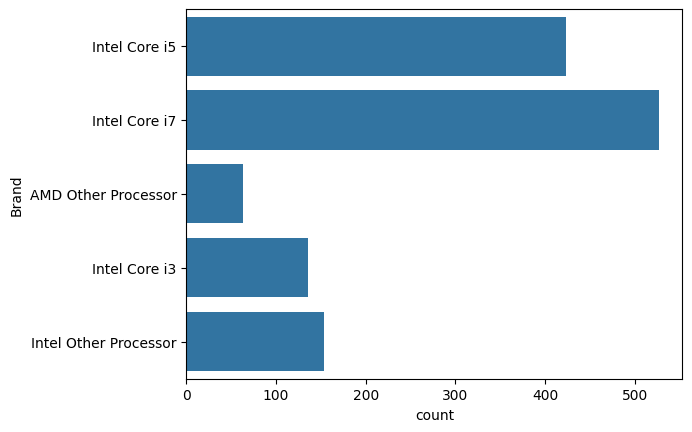

In [13]:
sns.countplot(df['Brand'])

In [14]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5


In [15]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [16]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [17]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<Axes: >

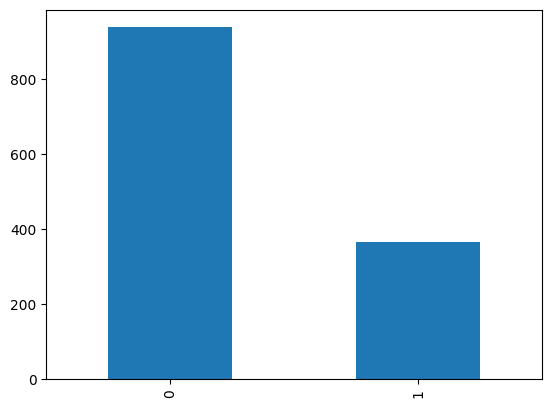

In [18]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

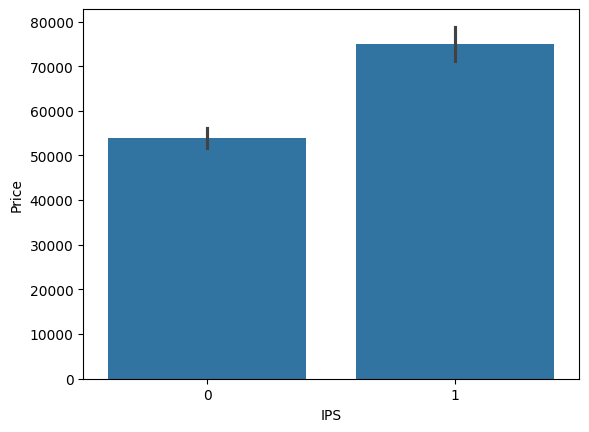

In [19]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [20]:
df['X_res']=df['ScreenResolution'].str.findall(r'(\d+\d+)').apply(lambda x:x[0])
df['Y_res']=df['ScreenResolution'].str.findall(r'(\d+\d+)').apply(lambda x:x[1])

In [21]:
df['X_res']=df['X_res'].astype(int)
df['Y_res']=df['Y_res'].astype(int)

In [22]:
df.corr()['Price']

<ipython-input-22-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
IPS            0.252208
Touchscreen    0.191226
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

<Axes: xlabel='Brand', ylabel='Price'>

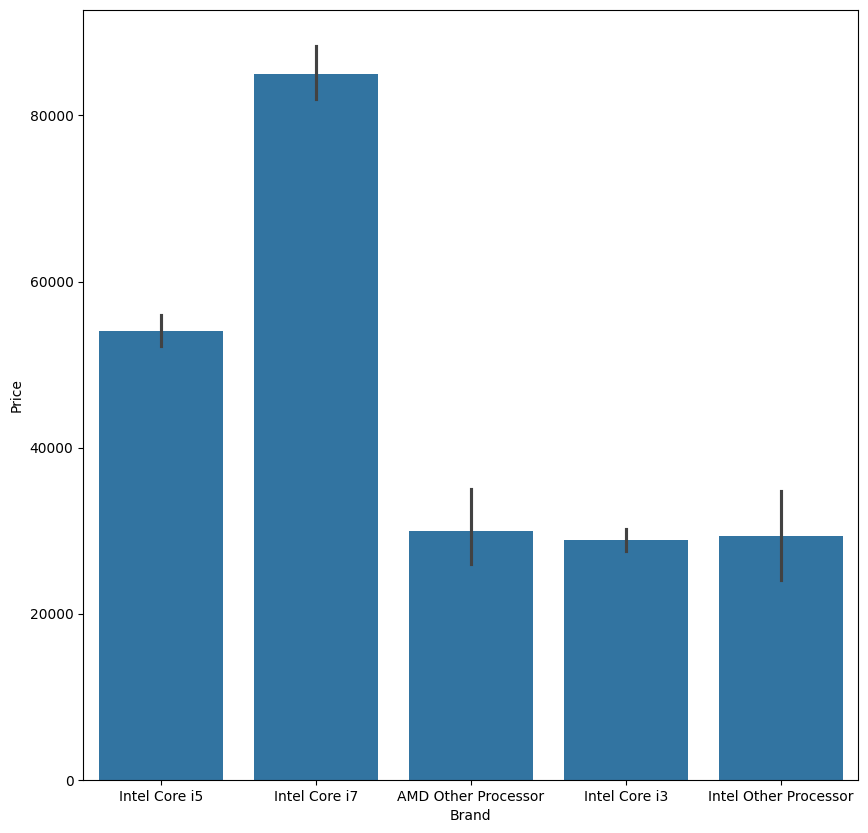

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Brand'],y=df['Price'])

In [24]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [25]:
import re
def findMemory(x,brand):
    if brand not in x:
      return str(0)
    s=x.split("+")
    for i in s:
      if brand in i:
        if 'TB' in i:
         return re.findall(r"\d+",i)[0]+'000'
        else: return re.findall(r"\d+",i)[0]

In [26]:
df['SSD']=df['Memory'].apply(lambda x: findMemory(x,'SSD'))
df['HDD']=df['Memory'].apply(lambda x: findMemory(x,'HDD'))
df['Hybrid']=df['Memory'].apply(lambda x: findMemory(x,'Hybrid'))
df['Flash Storage']=df['Memory'].apply(lambda x: findMemory(x,'Flash Storage'))

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand,IPS,Touchscreen,X_res,Y_res,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,1,0,2560,1600,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,1440,900,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,1920,1080,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,1,0,2880,1800,512,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,1,0,2560,1600,256,0,0,0


In [28]:
df['SSD']=df['SSD'].astype(int)
df['HDD']=df['HDD'].astype(int)
df['Hybrid']=df['Hybrid'].astype(int)
df['Flash Storage']=df['Flash Storage'].astype(int)

In [29]:
df.drop(['ScreenResolution','Cpu','Memory'],axis=1,inplace=True)

In [30]:
df.corr()['Price']

<ipython-input-30-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
IPS              0.252208
Touchscreen      0.191226
X_res            0.556529
Y_res            0.552809
SSD              0.676202
HDD             -0.095672
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64

In [31]:
df.drop(['Hybrid','Flash Storage'],axis=1,inplace=True)

In [32]:
df.rename(columns={'Brand':'Cpu_brand'},inplace=True)

In [33]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [34]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [35]:
df=df[df['Gpu_brand']!='ARM']

<Axes: xlabel='Gpu_brand', ylabel='Price'>

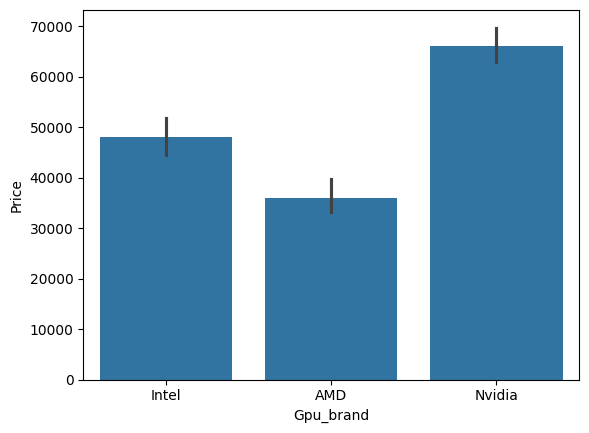

In [36]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'],estimator=np.median)

In [37]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Inches       1302 non-null   float64
 3   Ram          1302 non-null   int64  
 4   Gpu          1302 non-null   object 
 5   OpSys        1302 non-null   object 
 6   Weight       1302 non-null   float64
 7   Price        1302 non-null   float64
 8   Cpu_brand    1302 non-null   object 
 9   IPS          1302 non-null   int64  
 10  Touchscreen  1302 non-null   int64  
 11  X_res        1302 non-null   int64  
 12  Y_res        1302 non-null   int64  
 13  SSD          1302 non-null   int64  
 14  HDD          1302 non-null   int64  
 15  Gpu_brand    1302 non-null   object 
dtypes: float64(3), int64(7), object(6)
memory usage: 172.9+ KB


In [39]:
def convert_subset(x):
  if x=='Windows 10' or x=='Windows 7' or x=='Windows 10 S':
    return 'Windows'
  if x=='macOS' or x=='Mac OS X':
    return 'Mac'
  else :
    return 'Other'

In [40]:
df['OpSys']=df['OpSys'].apply(convert_subset)

In [41]:
df['OpSys'].value_counts()

Windows    1125
Other       156
Mac          21
Name: OpSys, dtype: int64

<ipython-input-42-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

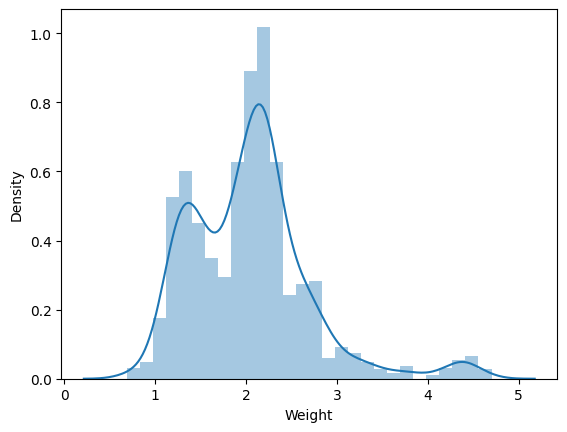

In [42]:
sns.distplot(df['Weight'])

In [50]:
X=df.drop(['Price'],axis=1)
y=np.log(df['Price'])

In [48]:
df.drop('Gpu',axis=1,inplace=True)

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Inches       1302 non-null   float64
 3   Ram          1302 non-null   int64  
 4   OpSys        1302 non-null   object 
 5   Weight       1302 non-null   float64
 6   Cpu_brand    1302 non-null   object 
 7   IPS          1302 non-null   int64  
 8   Touchscreen  1302 non-null   int64  
 9   X_res        1302 non-null   int64  
 10  Y_res        1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  HDD          1302 non-null   int64  
 13  Gpu_brand    1302 non-null   object 
dtypes: float64(2), int64(7), object(5)
memory usage: 152.6+ KB


In [59]:
X.sample(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Cpu_brand,IPS,Touchscreen,X_res,Y_res,SSD,HDD,Gpu_brand
1040,Lenovo,2 in 1 Convertible,15.6,4,Windows,1.80,Intel Core i7,1,1,1920,1080,256,0,Intel
431,Lenovo,Notebook,13.3,8,Windows,1.40,Intel Core i7,1,0,1920,1080,256,0,Intel
761,Dell,Ultrabook,12.5,16,Windows,1.18,Intel Core i7,0,0,1920,1080,256,0,Intel
748,Dell,Notebook,14.0,8,Windows,1.60,Intel Core i5,0,0,1366,768,256,0,Intel
711,Dell,Notebook,14.0,8,Other,1.64,Intel Core i5,0,0,1920,1080,256,0,Nvidia


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [62]:
st1=ColumnTransformer([('encoder',OneHotEncoder(sparse=False,drop='first'),[0,1,4,6,13])],remainder='passthrough')
st2=LinearRegression()

pipe=Pipeline([('st1',st1),('st2',st2)])
pipe.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 4, 6, 13])])),
                ('st2', LinearRegression())])

In [64]:
y_pre=pipe.predict(X_test)
print(r2_score(y_pre,y_test))

0.7781129367867616
